# Import what we need from Pandas and Scikit-learn

In [20]:
import numpy as np
import pandas as pd
import sklearn as sk

# Load some house sales data using Pandas

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = pd.read_csv('home_data.csv')

In [3]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

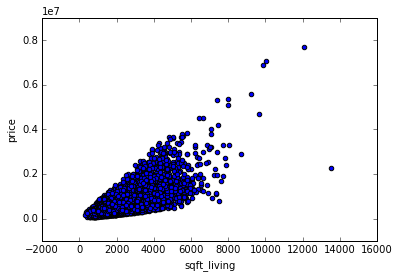

In [12]:
sales.plot(kind='scatter', x="sqft_living", y="price")

# Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [14]:
from sklearn.cross_validation import train_test_split

In [16]:
train_data,test_data = train_test_split(sales, test_size=0.2, random_state=0)

## Build the regression model using only sqft_living as a feature

In [21]:
from sklearn import linear_model

In [23]:
# Create linear regression object
sqft_model = linear_model.LinearRegression()

In [25]:
# Train the model using the training set and only one feature
sqft_model.fit(train_data['sqft_living'].reshape(-1,1), train_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Evaluate the simple model

In [26]:
print test_data['price'].mean()

529242.610687


In [30]:
# The error in prediction
err = sqft_model.predict(test_data['sqft_living'].reshape(-1,1)) - test_data['price']

# The Mean Square Error (MSE)
mse = np.mean(err**2)

# The Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)
rmse

248879.06143646996

RMSE of about \$248,879!

# Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

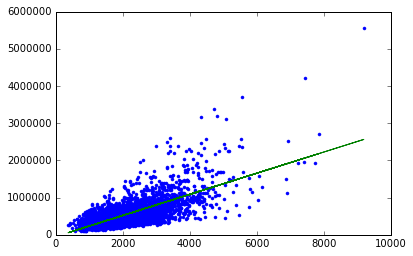

In [31]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data['sqft_living'].reshape(-1,1)),'-')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [36]:
print('Intercept: {}   Coefficients: {}'.format(sqft_model.intercept_, sqft_model.coef_))

Intercept: -48257.0634556   Coefficients: [ 283.96855737]


# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [37]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [43]:
sales[my_features].describe()

ERROR! Session/line number was not unique in database. History logging moved to new session 71


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,98077.939805
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,53.505026
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,98001.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,98033.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,98065.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,98118.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,98199.000000


KeyboardInterrupt: 

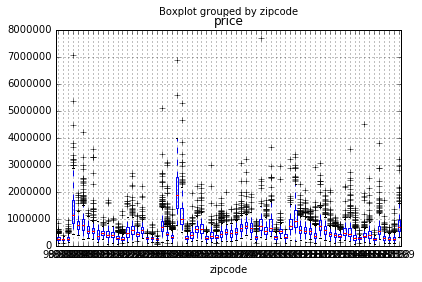

In [47]:
sales.boxplot(column='price', by='zipcode')

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

# Build a regression model with more features

In [48]:
my_features_model = linear_model.LinearRegression()
my_features_model.fit(train_data[my_features], train_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


## Comparing the results of the simple model with adding more features

In [52]:
# The error in prediction
err_sqft = sqft_model.predict(test_data['sqft_living'].reshape(-1,1)) - test_data['price']
err_my = my_features_model.predict(test_data[my_features]) - test_data['price']

# The maximum error
max_error_sqft = max(err_sqft)
max_error_my = max(err_my)

# The Root Mean Square Error (RMSE)
rmse_sqft = np.sqrt(np.mean(err_sqft**2))
rmse_my = np.sqrt(np.mean(err_my**2))

print("sqft_model:  max_error = {}  rmse = {}".format(max_error_sqft, rmse_sqft))
print("my_features_model:  max_error = {}  rmse = {}".format(max_error_my, rmse_my))

sqft_model:  max_error = 957495.228331  rmse = 248879.061436
my_features_model:  max_error = 1014161.05075  rmse = 244004.774431


The RMSE goes down from \$248,879 to \$244,004 with more features.

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [55]:
house1 = sales[sales['id']==5309101200]

In [19]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [56]:
print house1['price']

1054    620000
Name: price, dtype: int64


In [59]:
print sqft_model.predict(house1['sqft_living'].reshape(-1,1))

[ 633267.47422744]


In [60]:
print my_features_model.predict(house1[my_features])

[ 637556.26515922]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

## Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [61]:
house2 = sales[sales['id']==1925069082]

In [62]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [63]:
print sqft_model.predict(house2['sqft_living'].reshape(-1,1))

[ 1269357.04273158]


In [64]:
print my_features_model.predict(house2[my_features])

[ 1274443.76531342]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

## Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [65]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [66]:
print my_features_model.predict(pd.DataFrame(bill_gates)[my_features])

[ 15796988.23574052]


The model predicts a price of over $15M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)

# Assignment


## Selection and summary statistics for most expensive zipcode

In [67]:
expensive_neighborhood = sales[sales['zipcode']==98039]

In [68]:
expensive_neighborhood['price'].mean()

2160606.6

## Filtering Data

### Use logical filters to select rows of a DataFrame. 
Select houses that have 'sqft_living' higher than 2000 sqft but no larger than 4000 sft.  
Then compute what fraction of all houses have 'sqft_living' in this range.

In [69]:
midrange_sqft = sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] <= 4000)]

In [70]:
len(midrange_sqft)

9118

In [71]:
len(sales)

21613

In [72]:
len(midrange_sqft) / float(len(sales))

0.42187572294452413

## Building a regression model with several more features

In [73]:
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition',     # condition of house
'grade',         # measure of quality of construction
'waterfront',    # waterfront property
'view',          # type of view
'sqft_above',    # square feet above ground
'sqft_basement', # square feet in basement
'yr_built',      # the year built
'yr_renovated',  # the year renovated
'lat', 'long',   # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors
'sqft_lot15',    # average lot size of 15 nearest neighbors 
]
advanced_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'zipcode',
 'condition',
 'grade',
 'waterfront',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [74]:
advanced_model = linear_model.LinearRegression()
advanced_model.fit(train_data[advanced_features], train_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
# The error in prediction
err_adv = advanced_model.predict(test_data[advanced_features]) - test_data['price']
err_my = my_features_model.predict(test_data[my_features]) - test_data['price']

# The maximum error
max_error_adv = max(err_adv)
max_error_my = max(err_my)

# The Root Mean Square Error (RMSE)
rmse_adv = np.sqrt(np.mean(err_adv**2))
rmse_my = np.sqrt(np.mean(err_my**2))

print("adv_model:  max_error = {}  rmse = {}".format(max_error_adv, rmse_adv))
print("my_features_model:  max_error = {}  rmse = {}".format(max_error_my, rmse_my))

adv_model:  max_error = 1030026.59021  rmse = 190473.37571
my_features_model:  max_error = 1014161.05075  rmse = 244004.774431


In [76]:
rmse_improvement = rmse_my - rmse_adv
rmse_improvement

53531.398721372389